**Predicción de quién ganara el mundial de fútbol en 2026 usando algoritmo de regresión**
---

In [27]:
# Importar todo lo necesario
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [28]:
# Importar dataset
df = pd.read_csv("FIFAallMatchBoxData.csv")

In [30]:
# 1 = local gana, 0 = empate, -1 = visitante gana
def get_result(row):
    if row['hgoals'] > row['agoals']:
        return 1
    elif row['hgoals'] == row['agoals']:
        return 0
    else:
        return -1

df['result'] = df.apply(get_result, axis=1)

In [31]:
# Features relevantes
features = [
    'hPossesion','aPossesion',
    'hshotsOnTarget','ashotsOnTarget',
    'hshots','ashots',
    'hyellowCards','ayellowCards',
    'hfouls','afouls',
    'hsaves','asaves'
]

X = df[features]
y = df['result']


In [32]:
# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² score del modelo:", r2)

R² score del modelo: 0.48415303272454857


In [37]:
# Predicciones para todo el dataset
df['pred'] = model.predict(X)

# Score promedio por equipo local
home_strength = df.groupby('hname')['pred'].mean()

# Score promedio por equipo visitante
away_strength = df.groupby('aname')['pred'].mean()

# Unimos ambos
strength = home_strength.add(away_strength, fill_value=0) / 2
ranking = strength.sort_values(ascending=False).reset_index()
ranking.columns = ['Country', 'Strength']

print("\nRanking de países (Top 10):")
print(ranking.head(10))


Ranking de países (Top 10):
               Country  Strength
0             Suriname  0.674530
1              Bermuda  0.424230
2              Morocco  0.376163
3             Dominica  0.364830
4              Bolivia  0.340750
5            Guatemala  0.326380
6                 Mali  0.324339
7  Serbia & Montenegro  0.323706
8             Honduras  0.307849
9          El Salvador  0.305554


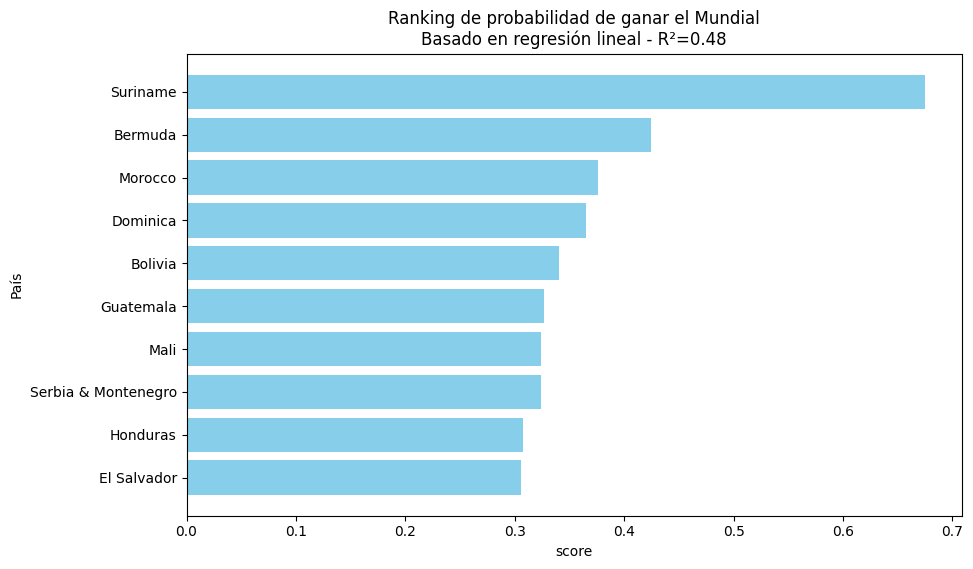

In [36]:
# Ranking
plt.figure(figsize=(10,6))
plt.barh(ranking['Country'][:10][::-1], ranking['Strength'][:10][::-1], color="skyblue")
plt.title(f"Ranking de probabilidad de ganar el Mundial\nBasado en regresión lineal - R²={r2:.2f}")
plt.xlabel("score")
plt.ylabel("País")
plt.show()
